<div>
  <img style="float: left;"  width="140" src=" 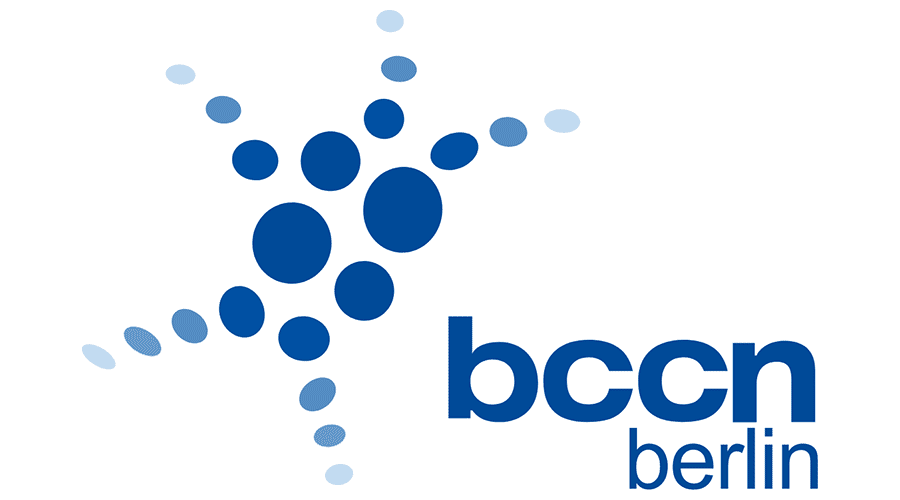">
</div>
 
<h1 id="course-title-heading">
    <div style="text-align: right">
        Models of Higher Brain Functions
        <br>Computer Course
        <br>
    </div>
</h1>
    
---
<div style="text-align: left; float: left">
    Lecturer: Prof. Dr. Henning Sprekeler
</div>

<div style="text-align: right">
    Assistant: Jarek Liesen
    <br>(jarek@bccn-berlin.de)
</div>



## General exercise instructions
These exercises should be completed entirely in this Jupyter Notebook (comprising source code, discussion and interpretation). Submission should be done through the Moodle interface and should consist only of this notebook (**a single `.ipynb` file**). This Jupyter Notebook was provided inside a `.zip` file, alongside additional files. Do not change the relative paths of these files when working on the assignment (meaning that e.g. `./helper.py` should always be in the same directory as this notebook).

Submission deadline is the start of the next lectue (**10:15 am on Fridays**).

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Some of the exercises will be automatically graded. Make sure that you:
1. Fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE"
2. Remove all `raise NotImplementedError` lines once you inserted your solution
3. Don't use variable names starting with underscore (e.g. `_myvar`) in your code, which could interfere with the automatic grading system.

Before you start, please fill in below your names and the name of your group as shown on Moodle. Example:
```
NAMES = ["Martina Musterfrau", "John Smith"]
GROUP = "A"
```

If you have any questions about the exercises, please ask them **on the Moodle forum** of the course.

In [1]:
NAMES = ["Erfan Baradarantohidi", "Ryan Gelston"]
GROUP = ""

In [1]:
# These are a few tests to make sure that your installed Python software is not too old
import sys
assert sys.version_info.major >= 3, "Your Python version is too old, please update it."

import IPython
assert IPython.version_info[0] >= 3, "Your IPython version is too old, please update it."

---

# Week 7: Reinforcement Learning I

In [2]:
# Necessary imports for this exercise, you can't modify these
import numpy as np
import matplotlib.pyplot as plt

# Import functions defined in the ./helpers.py file
from helpers import assert_var_defined

In [3]:
# You can add your additional package imports here

# Create plots inline in the Jupyter notebook
%matplotlib inline


## Exercise 1: The 10-armed bandit

In this exercise we will test multiple policies that are supposed to learn the optimal strategy for a 10-armed bandit. A 10-armed bandit is a machine consisting of 10 levers and a reward distribution device, e.g., a chocolate dispenser. Each lever has a fixed probability of generating a reward of 1 (piece of chocolate) when operated. At the beginning, the "agent" does not know anything about the machine, but while activating different levers,
she will learn more and more about the reward characteristics. While one aim is to get a good estimate of the reward probabilities by playing around (exploration), the agent concurrently intends to maximize the overall chocolate output (exploitation). The tricky question is: What is a good strategy that balances exploration and exploitation? Which levers should be activated given the reward history?


All strategies in this exercise rely on a common idea: The agent assigns a so-called $Q$-value $Q(a_{i}) = Q_{i}$ to each of the possible actions $a_{i}$ (press lever i). Ideally, the $Q$-values
mirror the expected reward associated with each action. After pressing a lever, the action values are updated depending on whether a reward was received ($R = 1$) or not ($R = 0$):

$$
\Delta Q_{i} = \eta [R-Q_{i}]
$$

The parameter $\eta$ represents the learning rate.

### 1 .1) Generate reward probabilities (0 points)

Generate an array `p` of 10 random lever reward probabilities $p_{i} \in [0,0.9]$ and **keep it fixed for the entire exercise sheet**.

In [23]:
num_levers = 10
p = np.random.uniform(0, 0.9, num_levers)

In [24]:
""" Test that variable `p` is defined """

assert_var_defined("p")

### 1.2) Implemente an N-armed bandit (0.5 points)

Write a function `generate_reward` that will behave as an N-armed bandit (given lever numbers corresponding to indices into `p`, it returns rewards of 1 with a probability $p_{i}$ , otherwise zeros).
Confirm that your bandit works: Activate each lever 10000 times and compare the mean reward for each lever with its reward probability – they should be nearly identical.

In [25]:
def generate_reward(i):
     return np.random.binomial(1,p[i])

In [7]:
""" Test that function `generate_reward` is defined """

assert_var_defined("generate_reward", func=True)

#### 1.2 b) Test your reward function


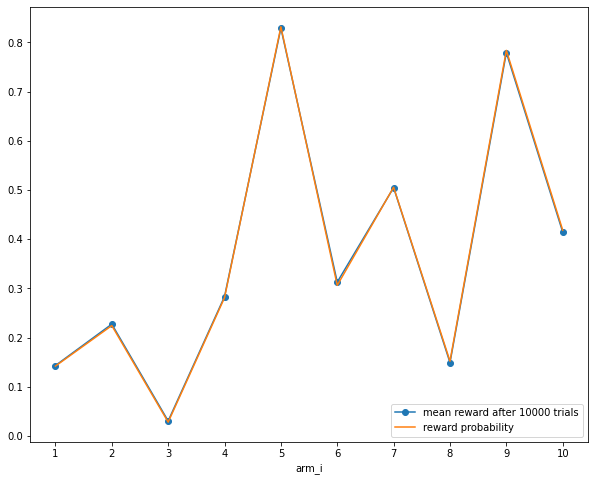

In [26]:
ntrial=10000
n=num_levers
r=np.zeros(n)

for t in range(ntrial):
    for i in range(n):
        r[i]=r[i] + generate_reward(i)

r=r/ntrial
plt.figure(figsize=(10,8))
plt.plot(np.arange(1,n+1),r, label='mean reward after 10000 trials', marker='o')
plt.plot(np.arange(1,n+1),p, label='reward probability')
plt.xlabel('arm_i')
plt.xticks(np.arange(1,n+1))
plt.legend(loc='lower right')

### 1.3) Device some method of storing and updating the $Q$-values (1 point)

Devise some method of storing and updating the $Q_{i}$ value associated with the action of pressing lever i (take $\eta$ = 0.01). Q should be initialized with zeros, since the agent is pessimistic and initially associates zero value with each action.


In [27]:
Q=np.zeros(n)
eta=0.01
def qupdate(Q,i):
    ri=generate_reward(i)
    Q[i]=Q[i]+eta*(ri-Q[i])

### 1.4) Implement the *$\epsilon$-greedy* policy (1 point)

We will first implement the $\epsilon$-greedy policy: The agent will with probability $1 − \epsilon$ press the lever which has the maximum associated Q-value (if there are several with that value, press them all), otherwise press a random lever. The agent starts by pressing all levers (since they all have the same Q-value initially), it updates the Q-values and then applies the described strategy iteratively. 

Write a function `eps_greedy` that implements this strategy. 

The function should accept as input the current $Q$ and should return the lever index (or indices)
that are to be pressed, the Q-value of the chosen lever, as well as the largest Q-value.

In [28]:
def eps_greedy(Q, epsilon=0):
    
    maxQ=np.max(Q)
    optimali=np.where(Q==maxQ)[0]

    p_eps=np.random.binomial(1,1-epsilon)
    #p_eps is 1 with probability 1-epsilon and 0 with probability epsilon so if p_eps==1 then we choose the optimal action
    
    if p_eps==1:
        return optimali,Q[optimali], maxQ
        # print(optimali)
        
    else:
        randomi=np.random.randint(1,n)
        return randomi,Q[randomi], maxQ
       

### 1.5) Test the pure-greedy algorithm (2 points)

#### 1.5 a) Implement the algorithm (1 point)
First we'll test the pure-greedy algorithm. Write a function that sets $\epsilon = 0$ and runns 1000 iterations of the algorithm: 
  1. Choose the next lever(s) (`eps_greedy`).
  2. Activate the chosen levers (`generate_reward`).
  3. Update the Q-values according to the received rewards.


In [29]:
def pure_greedy(Q,ntrial=1000, eps=0):
        # indexs=np.zeros(ntrial)
        Qhist=np.zeros((ntrial,n))
        for t in range(ntrial):
                i,Qi,maxQ=eps_greedy(Q,eps)
                # print(i)
                qupdate(Q,i)
                # if type(i)!= int : indexs[t]=i[0]
                # else: indexs[t]=i
                Qhist[t,:]=Q
        return Qhist

#### 1.5 b) Plot the estimated expecte rewards for 20 "lives" (0.5 points)

Plot the estimated expected reward (the Q-value of the current lever) against the trial number (each lever press constitutes one trial).

Repeat the test 20 times and draw the resulting curves into a single plot.


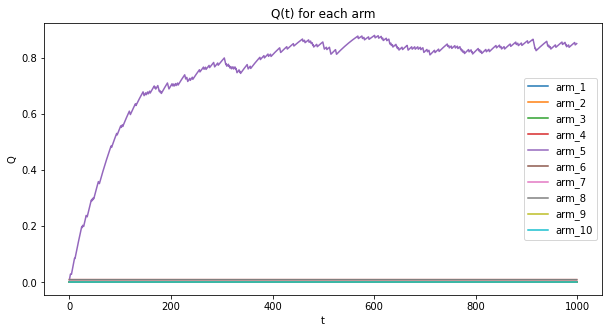

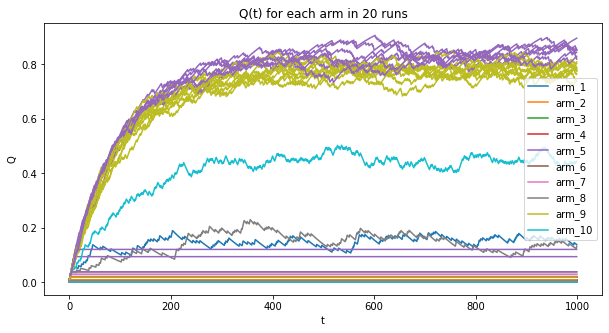

In [33]:
plt.figure(figsize=(10,5))
Q=np.zeros(n)
t=range(1000)
labels = ['arm_{}'.format(i+1) for i in range(n)]
qh=pure_greedy(Q)
plt.plot(t,qh, label=labels)
plt.legend()
plt.xlabel('t')
plt.ylabel('Q')
plt.title('Q(t) for each arm')

plt.figure(figsize=(10,5))
t=range(1000)
for j in range(20):
        Q=np.zeros(n)
        qh=pure_greedy(Q)
        plt.plot(t,qh)
plt.xlabel('t')
plt.ylabel('Q')
plt.title('Q(t) for each arm in 20 runs')
plt.legend(labels)
        


#### 1.5 c) Discuss your results (0.5 points)

Does the agent consistently identify the levers with the largest reward probabilities? Explain which levers the agent pulls in the first trials and how this resulst in the behavior you plotted.

No as observed in the last plot, most of the time arm 5 or 9 which is the arm with largest reward probability is chosen, but it is not consistently choosen and other arms are choosen too, if we print the chossen arms in the first trials all of the arms are choosen since the estimared Q values are zero for all, it can be repeated that multiple ones might be choosen since given the probability of generated rewards we don't get a good estimate of the Q-values 

* q value of the current arm always match the largest Q-value since after a while that's the only q value that get choosen and updated

### 1.6) Test the $\epsilon$-greedy algorithm

#### 1.6 a) Simulate the algorithm for different $\epsilon$ values (2 points)

Run 100 repetitions ("lives") of the $\epsilon$-greedy strategy (with four different $\epsilon$-values 0.0, 0.01, 0.1 and 0.5) at 1000 iterations each and store the expected reward in each trial. 


Plot the average of the expected reward, and the average largest Q-value across lives against the trial number. Include a line in the plot that runs parallel to the x-axis and represents the maximum expected reward (the maximum reward probability). 

In [34]:
ep_values = np.array([0.0, 0.01, 0.1, 0.5])
num_lives = 100
num_trials = 1000

exp_reward = np.zeros((ep_values.size, num_lives, num_trials))
max_q_val = np.zeros((ep_values.size, num_lives, num_trials))

for epi in range(ep_values.size):
    epsilon = ep_values[epi]
    for j in range(num_lives):
        Q = np.zeros(num_levers)
        for k in range(num_trials):
            i,Qi,maxQ=eps_greedy(Q,epsilon)

            #this part tries to make sure that in case multiple arms have the same maxQ, we choose one of to store in max_q_val and exp_reward
            #the choice of which arm to choose is dosent change the result 
            if Qi.size!=1: exp_reward[epi,j,k]=Qi[-1]
            else: exp_reward[epi,j,k]=Qi

            if maxQ.size!=1: max_q_val[epi,j,k]=maxQ[0]
            else: max_q_val[epi,j,k]=maxQ

            qupdate(Q,i)

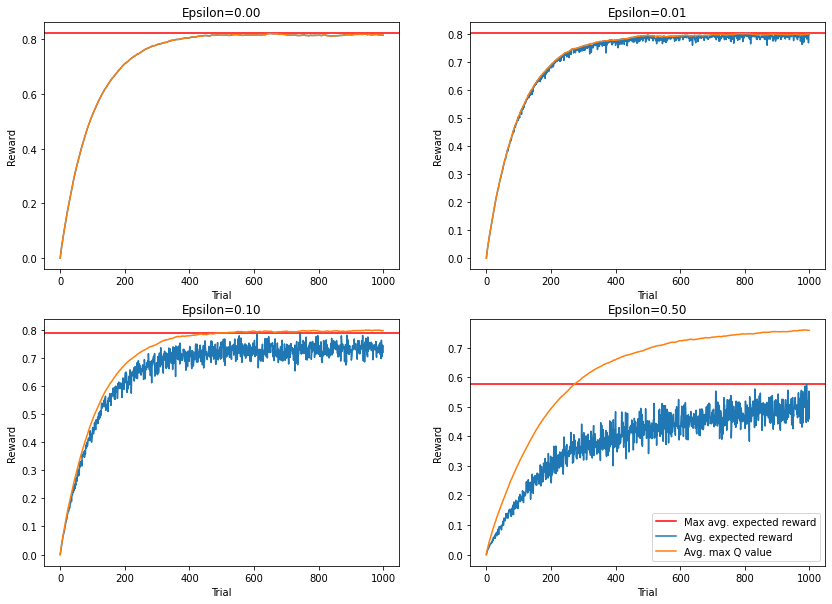

In [43]:
fig, axs = plt.subplots(2,2, figsize=(14, 10))
for i in range(ep_values.size):
    axs[i//2, i%2].set_title("Epsilon=%0.2f"%ep_values[i])
    axs[i//2, i%2].set_xlabel("Trial")
    axs[i//2, i%2].set_ylabel("Reward")

    axs[i//2, i%2].axhline(y=exp_reward[i].mean(axis=0).max(), 
                           color='r', label="Max avg. expected reward")
    #this is basically max reward that we can get over 20 lives and 1000 trials per each life
    
    axs[i//2, i%2].plot(exp_reward[i].mean(axis=0), label="Avg. expected reward")
    
    axs[i//2, i%2].plot(max_q_val[i].mean(axis=0), label="Avg. max Q value")

axs[1,1].legend(loc='lower right')
    

#### 1.6b) Discuss your results (2 points)

Why do the expected reward and largest Q-value curves look the way they do for the four cases?

The $\epsilon$-greedy policy chooses a random arm with probability $\epsilon$. As such we are only choosing the arm with the maximum expected reward with probability $1-\epsilon$. The difference between the average expected reward and the average max Q value demonstrate this. As $\epsilon$ increases we notice a larger difference between these two curves. This is because as $\epsilon$ increases we are choosing random levers with greater likelihood, which will result in an expected reward that is lower than the maximum expected reward, or rather the max Q value. We see, however, that while there is a greater discrepency between the two curves, that as $\epsilon$ increases so does the the expected reward and max Q value, as seen by the labels on the y-axis. 

### 1.7 Implement a *SoftMax* policy

Finally, we program a *SoftMax* policy: The agent presses the levers with probabilities that depend on the Q-values:

$$
P_{i} = \frac{\exp(\beta Q_i)}{\sum_j\exp(\beta Q_{j})}
$$



#### 1.7a) Write a function that implements the policy (1 point)

Write a function `softmax` that implements this strategy. The function/method should accept as input the current Q and output the lever index(it will always be a single lever index!) that is to be pressed, as well as the maximum Q-value.

In [35]:
# def softmax(Q, beta):
#     sm_p = np.exp(beta*Q) / np.exp(beta*Q).sum()
#     r_num = np.random.uniform(0,1)
#     idx = 0
#     total = sm_p[idx]
#     while r_num > total:
#         idx += 1
#         total += sm_p[idx]
#     return idx
def softmax(Q, beta):
    maxQ=np.max(Q)
    sm_p = np.exp(beta*Q) / np.exp(beta*Q).sum()
    # print(np.random.choice(np.arange(len(sm_p)), p=sm_p))
    return np.random.choice(np.arange(len(sm_p)), p=sm_p)
    

#### 1.7 b) Simulate the *SoftMax* strategy for different $\beta$ (1.5 points)

Test this function by running 100 lives with 5000 iterations each and store the expected reward and maximum Q-value in each trial. 

Draw the same curves as in task 1.6 for different values of  $\beta$  = 1, 5, 15, 50.

In [36]:
beta_values = np.array([1.0, 5.0, 15.0, 50.0])
num_lives = 100
num_trials = 5000
learning_rate = 0.01

exp_reward = np.zeros((ep_values.size, num_lives, num_trials))
max_q_val = np.zeros((ep_values.size, num_lives, num_trials))

for i in range(beta_values.size):
    beta = beta_values[i]
    for j in range(num_lives):
        Q = np.zeros(num_levers)
        for k in range(num_trials):
            decision=softmax(Q, beta)
            # print(decision)
            exp_reward[i,j,k] = Q[decision]
            max_q_val[i,j,k] = Q.max()
            reward = generate_reward(decision)
            Q[decision] += learning_rate*(reward - Q[decision])

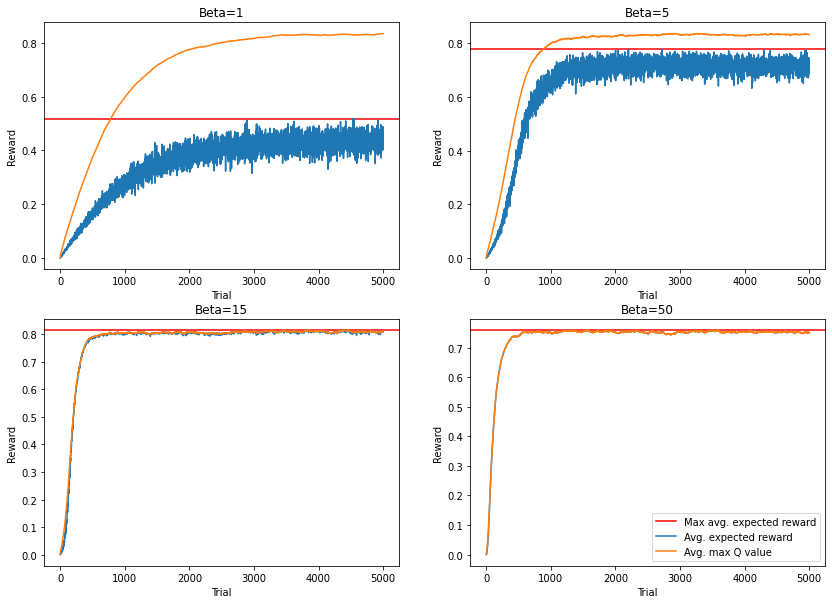

In [37]:
fig, axs = plt.subplots(2,2, figsize=(14, 10))
for i in range(beta_values.size):
    axs[i//2, i%2].set_title("Beta=%0.0f"%beta_values[i])
    axs[i//2, i%2].set_xlabel("Trial")
    axs[i//2, i%2].set_ylabel("Reward")
    axs[i//2, i%2].axhline(y=exp_reward[i].mean(axis=0).max(), 
                           color='r', label="Max avg. expected reward")
    axs[i//2, i%2].plot(exp_reward[i].mean(axis=0), label="Avg. expected reward")
    axs[i//2, i%2].plot(max_q_val[i].mean(axis=0), label="Avg. max Q value")

axs[1,1].legend(loc='lower right')

#### 1.7c) Discuss your results (1 point)

Do the results of SoftMax show any improvements compared to the $\epsilon$-greedy policies? 


The gap between the average expected reward and the average max Q value is reversed here, while $\beta$ is closer to 0, we don't pick the max with higher probability, but as $\beta$ increases we pick the max with higher probability, and the average expected reward is closer to the average max Q value for higher $\beta$ values. so ingenral we do not get better results with softmax policy compared to $\epsilon$-greedy policies.

#### 1.7 d) Explain the $\beta$-parameter (1 point)

How does the parameter $\beta$ relate to the exploration/exploitation-balance? 

The $\beta$ parameter determines to what extent the highest probability entry approaches 1 and to what extent the others approach 0. Lower values of $\beta$ allow for more exploration, as the non-max values will have larger values, or rather will be further away from zero. High values of $\beta$ restrict exploration by pushing all values towards 1 or 0. 

#### 1.7 e) Explain your results (1 points)

And once again explain why for each $\beta$ the two curves (expected reward & largest Q-value) look the way they do.

The more we explore the larger the gap between the expected reward and largest Q-value. As mentioned above, the larger the value of $\beta$, the less we explore non-optimal values, and sure enough, as seen in the above plot, the larger the $\beta$ value, the smaller the difference betwen the expected reward and largest Q-value. 

### 1.8) Add a catastrophic action

#### 1.8 a) Modify your bandit and test your policies (1 point)
Modify the 10-armed bandit so that operating the last lever always gives a reward of -5000 (the agent is punished and has to return 5000 pieces of chocolate). 

Test both the epsilon-greedy and SoftMax policies on this modified bandit (use $\epsilon$ = 0.1, $\beta$ = 15) by running 500 lives with 1000 iterations each and plot the same curve as in task 6.

In [48]:
def generate_reward_w_trench(i):
    if type(i) == np.ndarray and any(i==9):
        return -5000
    #pulling the lever 9 with other levers is treated as a catastrophic event
    if type(i) == np.int64 and i==9:
        return -5000

    else:
        return generate_reward(i)

num_lives = 500
num_trials = 1000
epsilon = 0.1
beta = 15
e_exp_reward = np.zeros((num_lives, num_trials))
e_max_q_val = np.zeros((num_lives, num_trials))
b_exp_reward = np.zeros((num_lives, num_trials))
b_max_q_val = np.zeros((num_lives, num_trials))

for i in range(num_lives):
    e_Q = np.zeros(num_levers)
    b_Q = np.zeros(num_levers)
    for j in range(num_trials):
        e_decision,Qi,maxQ  = eps_greedy(e_Q, epsilon)

        if Qi.size!=1: e_exp_reward[i,j] = Qi[-1]
        else:   e_exp_reward[i,j] = Qi
       
        e_max_q_val[i,j] = e_Q.max()
        reward = generate_reward_w_trench(e_decision)
        e_Q[e_decision] += learning_rate*(reward - e_Q[e_decision])
        
        b_decision = softmax(b_Q, beta)
        b_exp_reward[i,j] = b_Q[decision]
        b_max_q_val[i,j] = b_Q.max()
        reward = generate_reward_w_trench(b_decision)
        b_Q[b_decision] += learning_rate*(reward - b_Q[b_decision])



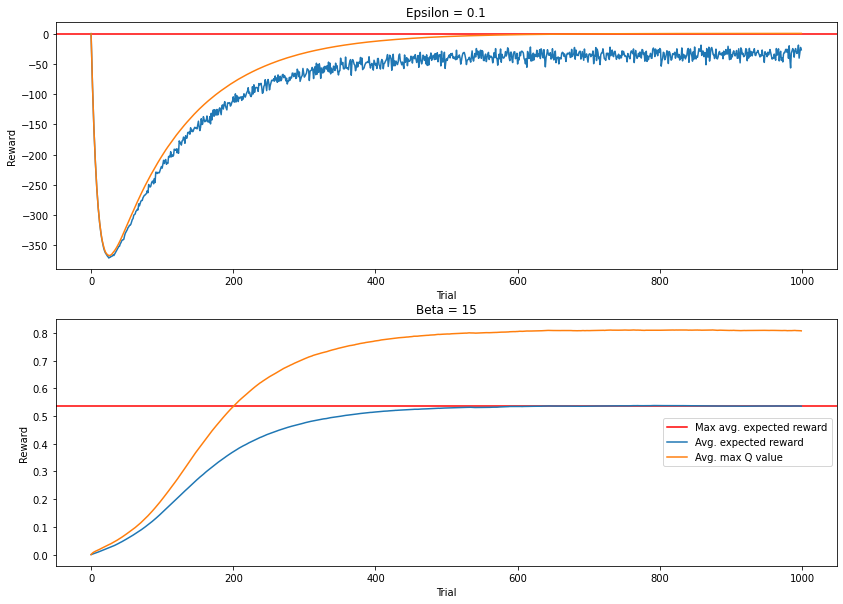

In [49]:
fig, axs = plt.subplots(2, figsize=(14, 10))

axs[0].set_title("Epsilon = 0.1")
axs[0].set_xlabel("Trial")
axs[0].set_ylabel("Reward")
axs[0].axhline(y=e_exp_reward.mean(axis=0).max(), 
                       color='r', label="Max avg. expected reward")
axs[0].plot(e_exp_reward.mean(axis=0), label="Avg. expected reward")
axs[0].plot(e_max_q_val.mean(axis=0), label="Avg. max Q value")

axs[1].set_title("Beta = 15")
axs[1].set_xlabel("Trial")
axs[1].set_ylabel("Reward")
axs[1].axhline(y=b_exp_reward.mean(axis=0).max(), 
                       color='r', label="Max avg. expected reward")
axs[1].plot(b_exp_reward.mean(axis=0), label="Avg. expected reward")
axs[1].plot(b_max_q_val.mean(axis=0), label="Avg. max Q value")

axs[1].legend(loc='right')

#### 1.8 b) Discuss your results (1 point)

Do you observe a difference? Give an intuition for the result! (After this task ditch the punishment and return to the original bandit.)

choosing softmax policy apparantly escaped catastrophic action, since it chooses the max with higher probability, but $\epsilon$-greedy policy is not able to escape catastrophic action, since it chooses random arms with probability $\epsilon$ and it is not able to learn that the last arm is a bad arm, since it is not choosen enough times to get a good estimate of its Q-value. and that's why the max average reward is zero for epsilon greedy policy and it is positive for softmax policy. in both cases there is a gap between the average expected reward and the average max Q value, but the gap is larger for softmax policy.

### 1.9) Implement a *modified SoftMax* policy with dynamic $\beta$

#### 1.9 a) Implemente the new policy (1 point)

Implement a modified SoftMax policy, where the parameter $\beta$ increases linearly with the number of iterations i starting at a value of 1:

$$
\beta(i) = 1 + \frac{i}{b}
$$

In [50]:
def softmax_dynamic(Q, i, b=1):
    beta = 1 + i / b
    return softmax(Q, beta)

#### 1.9 b) Test the policy for different $\beta$-slopes (0.5 points)

Run the simulations with 5 different $\beta$-slopes: b = 0.1, 0.4, 1.6, 6.4, 25.6. and also with the simple SoftMax ($\beta$ = 5).
In each simulation, run 100 lives with 2000 iterations and plot the same curves as in task 6.

How are the plots with different $\beta$-slopes different from the simple SoftMax simulation?


In [51]:
b_values = np.array([0.1, 0.4, 1.6, 6.4, 25.6])
beta = 5
num_lives = 100
num_trials = 2000

exp_reward = np.zeros((b_values.size+1, num_lives, num_trials))
max_q_val = np.zeros((b_values.size+1, num_lives, num_trials))
rewards = np.zeros((b_values.size+1, num_lives, num_trials))

for i in range(b_values.size):
    b = b_values[i]
    for j in range(num_lives):
        Q = np.zeros(num_levers)
        for k in range(num_trials):
            decision = softmax_dynamic(Q, b)
            exp_reward[i,j,k] = Q[decision]
            max_q_val[i,j,k] = Q.max()
            reward = generate_reward(decision)
            rewards[i,j,k] = reward
            Q[decision] += learning_rate*(reward - Q[decision])
            
for j in range(num_lives):
    Q = np.zeros(num_levers)
    for k in range(num_trials):
        decision = softmax(Q, beta)
        exp_reward[5,j,k] = Q[decision]
        max_q_val[5,j,k] = Q.max()
        rewards[5,j,k] = generate_reward(decision)
        Q[decision] += learning_rate*(rewards[5,j,k] - Q[decision])

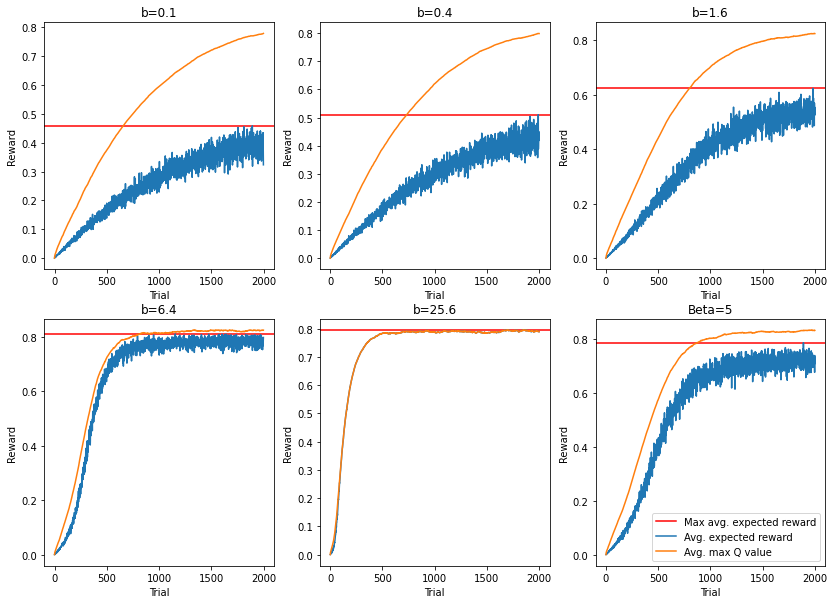

In [52]:
fig, axs = plt.subplots(2,3, figsize=(14, 10))
for i in range(b_values.size):
    j = i // 3
    k = i % 3
    axs[j, k].set_title("b={}".format(b_values[i]))
    axs[j, k].set_xlabel("Trial")
    axs[j, k].set_ylabel("Reward")
    axs[j, k].axhline(y=exp_reward[i].mean(axis=0).max(), 
                      color='r', label="Max avg. expected reward")
    axs[j, k].plot(exp_reward[i].mean(axis=0), label="Avg. expected reward")
    axs[j, k].plot(max_q_val[i].mean(axis=0), label="Avg. max Q value")

j = 1
k = 2
axs[j, k].set_title("Beta=%0.0f"%beta)
axs[j, k].set_xlabel("Trial")
axs[j, k].set_ylabel("Reward")
axs[j, k].axhline(y=exp_reward[5].mean(axis=0).max(), 
                  color='r', label="Max avg. expected reward")
axs[j, k].plot(exp_reward[5].mean(axis=0), label="Avg. expected reward")
axs[j, k].plot(max_q_val[5].mean(axis=0), label="Avg. max Q value")    
    
axs[1,2].legend(loc='lower right')

beta slope, b, control how long we explore, for a large b we prevent the groth of beta fast and so we explore more in the beginning, for b less than one we get a large beta in the beginning and so we explore less in the beginning so the gap is larger and max average reward is smaller. 
and for a static beta we still have a gap between the average expected reward and the average max Q value.

#### 1.9 c) Plot the cumulative sum of true rewards (0.5)

In a different figure, plot the cumulative sum of true rewards (the sum of rewards until the current trial, aver-
aged over lives) against trial number.

What do you observe?

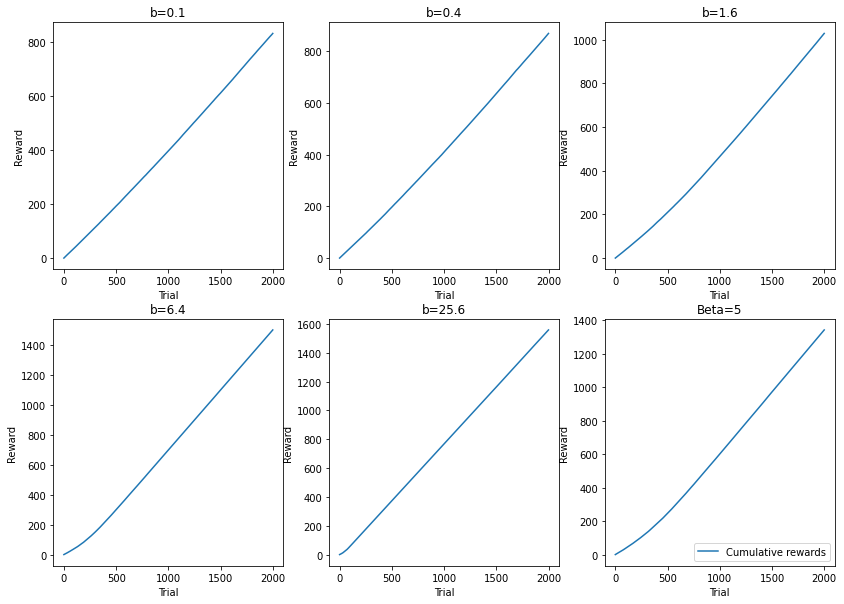

In [53]:
fig, axs = plt.subplots(2,3, figsize=(14, 10))
for i in range(b_values.size):
    j = i // 3
    k = i % 3
    axs[j, k].set_title("b={}".format(b_values[i]))
    axs[j, k].set_xlabel("Trial")
    axs[j, k].set_ylabel("Reward")
    axs[j, k].plot(rewards[i].cumsum(axis=1).mean(axis=0), label="Cumulative rewards")

j = 1
k = 2
axs[j, k].set_title("Beta=%0.0f"%beta)
axs[j, k].set_xlabel("Trial")
axs[j, k].set_ylabel("Reward")
axs[j, k].plot(rewards[5].cumsum(axis=1).mean(axis=0), label="Cumulative rewards")
    
axs[1,2].legend(loc='lower right')

the cumulative sum of true rewards is increasing faster for a large b, since we explore more in the beginning, althogh it is not increasing much faster than the static beta case.

#### 1.9 d) Plot the cumulative reward against $\beta$-slope (0.5 points)

Furthermore, plot the cumulative reward at the end of the lifetime (2000 iterations) against the $\beta$-slope.

Which of the five slopes generates the maximum overall reward?

([<matplotlib.axis.XTick at 0x7f788f8628e0>,
 [Text(0.1, 0, '0.1'),
  Text(0.4, 0, '0.4'),
  Text(1.6, 0, '1.6'),
  Text(6.4, 0, '6.4'),
  Text(25.6, 0, '25.6')])

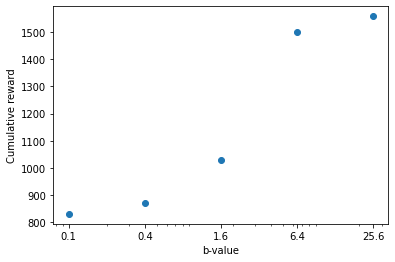

In [54]:
plt.xscale('log')
plt.xlabel('b-value')
plt.ylabel('Cumulative reward')
plt.scatter(b_values, rewards[:5].sum(axis=2).mean(axis=1))
plt.xticks(b_values, b_values)

as discussed above, the larger the b the larger the cumulative reward at the end of the lifetime, so the slope 25.6 generates the maximum overall reward.

#### 1.9 e) Discuss the idea behind using a varying $\beta$ (1 point)

Explain the idea behind using a varying β, in particular regarding the exploration/exploitation dilemma?

Can you think of a similar modification to the  $\epsilon$-greedy policy?

again as discussed above, b controls how long we explore, for a large b we prevent the groth of beta fast and so we explore more in the beginning, for b less than one we get a large beta in the beginning and so we explore less in the beginning, and it make sence to explore more in the beginning and less later, since we don't have enough information about the Q-values in the beginning and we need to explore more to get more information about the Q-values, and then with enough evidence we can exploit the best arm.
for a similar approach to $\epsilon$-greedy policy we can use a varying $\epsilon$ that decreases with the number of iterations, so we explore more in the beginning and less later.